In [93]:
import sys
sys.executable

'd:\\house_price\\house-price-prediction-ml\\venv\\Scripts\\python.exe'

In [145]:
import pandas as pd

df = pd.read_excel("../data/raw/Case Study 1 Data.xlsx")
df.head()

,Property ID,Location,Size,Bedrooms,Bathrooms,Year Built,Condition,Type,Date Sold,Price
0,SI_000001,CityA,3974.0,2.0,2.0,2007.0,Good,Single Family,2020-11-02,324000.0
1,SI_000002,CityA,1660.0,2.0,3.0,1934.0,Good,Single Family,2022-10-23,795000.0
2,SI_000003,CityC,2094.0,2.0,2.0,1950.0,Good,Single Family,2020-11-30,385000.0
3,SI_000004,CityB,1930.0,2.0,3.0,1905.0,Good,Single Family,2021-12-09,651000.0
4,SI_000005,CityB,1895.0,5.0,2.0,1936.0,New,Single Family,2024-10-30,1878000.0


In [95]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 247172 entries, 0 to 247171
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Property ID  247172 non-null  str           
 1   Location     247172 non-null  str           
 2   Size         244701 non-null  float64       
 3   Bedrooms     238769 non-null  float64       
 4   Bathrooms    240499 non-null  float64       
 5   Year Built   234567 non-null  float64       
 6   Condition    236544 non-null  str           
 7   Type         247172 non-null  str           
 8   Date Sold    247172 non-null  datetime64[us]
 9   Price        241735 non-null  float64       
dtypes: datetime64[us](1), float64(5), str(4)
memory usage: 18.9 MB


In [96]:
# Data summary: shape, dtypes, describe
print('Shape:', df.shape)
print('\nColumn types:')
print(df.dtypes.value_counts())


Shape: (247172, 10)

Column types:
float64           5
str               4
datetime64[us]    1
Name: count, dtype: int64


In [97]:
# Missing values analysis
missing = df.isnull().mean().sort_values(ascending=False)
missing = (missing[missing>0] * 100).round(2)
if len(missing):
    display(missing.to_frame('pct_missing'))
else:
    print('No missing values found')

,pct_missing
Year Built,5.1
Condition,4.3
Bedrooms,3.4
Bathrooms,2.7
Price,2.2
Size,1.0


In [98]:
# Plotting imports and simple visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

num = df.select_dtypes(include=['number']).columns.tolist()
cat = df.select_dtypes(include=['object','category']).columns.tolist()
print('Numeric columns:', len(num))
print('Categorical columns:', len(cat))

Numeric columns: 5
Categorical columns: 4


C:\Users\RUPAPRIYA\AppData\Local\Temp\ipykernel_18648\614569467.py:7: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat = df.select_dtypes(include=['object','category']).columns.tolist()


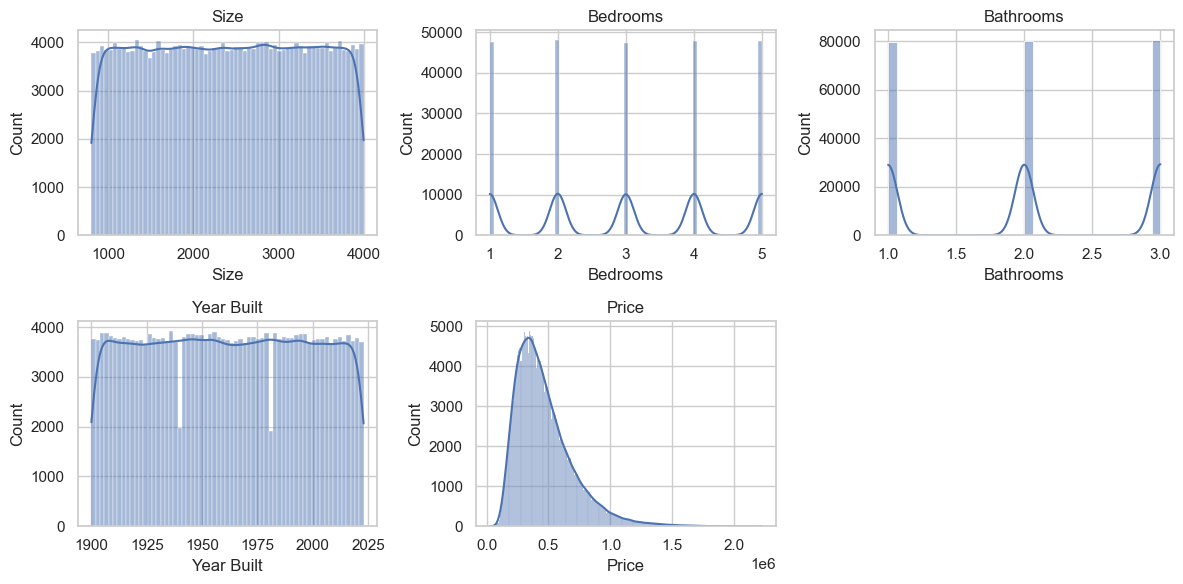

In [99]:
# Histograms for numeric features (compact layout)
if len(num):
    ncols = 3
    nrows = (len(num) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows))
    axes = axes.flatten()
    for i, col in enumerate(num):
        sns.histplot(df[col].dropna(), ax=axes[i], kde=True)
        axes[i].set_title(col)
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    fig.tight_layout()
    plt.show()
else:
    print('No numeric columns to plot')

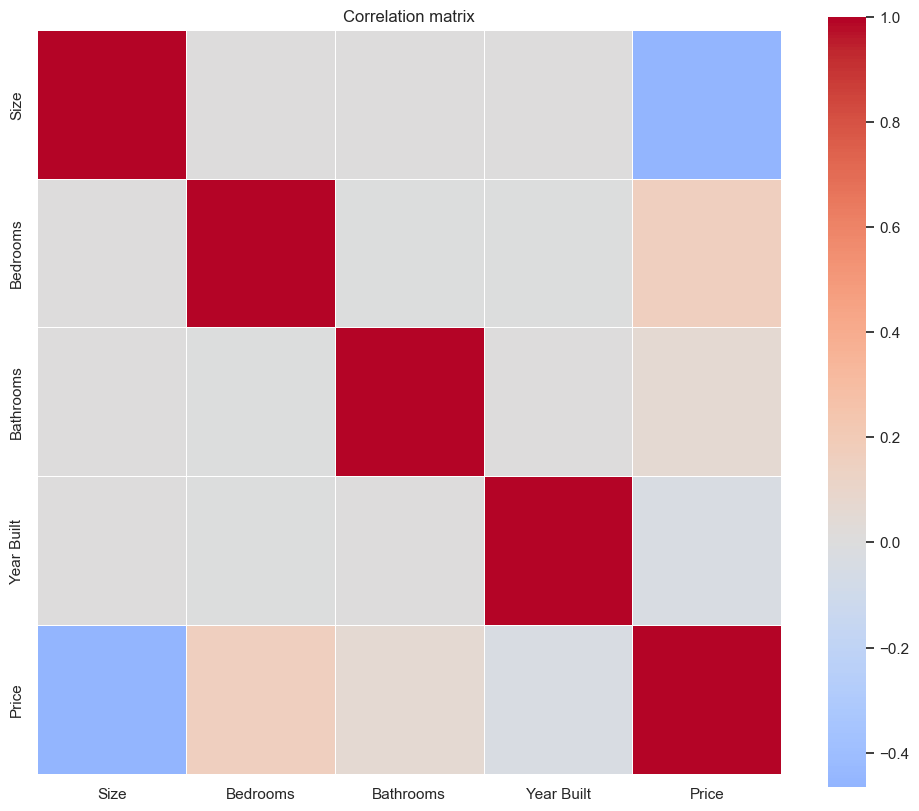

In [100]:
# Correlation matrix heatmap (numeric only)
if len(num) > 1:
    corr = df[num].corr()
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cmap='coolwarm', center=0, square=True, linewidths=.5)
    plt.title('Correlation matrix')
    plt.show()
else:
    print('Not enough numeric columns for correlation matrix')

In [101]:
# Simple outlier detection using IQR for numeric columns
from scipy import stats
outlier_summary = {}
for col in num:
    s = df[col].dropna()
    if s.size == 0:
        continue
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = s[(s < lower) | (s > upper)]
    outlier_summary[col] = {'n_outliers': int(outliers.size), 'pct': float(outliers.size / s.size) if s.size else 0}

import pandas as _pd
_os = _pd.DataFrame.from_dict(outlier_summary, orient='index').sort_values('pct', ascending=False)
display(_os.head(20))

,n_outliers,pct
Price,7980,0.033011
Size,0,0.000000
Bedrooms,0,0.000000
Bathrooms,0,0.000000
Year Built,0,0.000000


In [102]:
# Categorical feature overview
if len(cat):
    for c in cat:
        print('\n--', c, '-- unique:', df[c].nunique())
        print(df[c].value_counts(dropna=False).head(10))
else:
    print('No categorical columns detected')


-- Property ID -- unique: 247172
Property ID
SI_000001    1
SI_000002    1
SI_000003    1
SI_000004    1
SI_000005    1
SI_000006    1
SI_000007    1
SI_000008    1
SI_000009    1
SI_000010    1
Name: count, dtype: int64

-- Location -- unique: 4
Location
CityC    62082
CityA    61916
CityD    61724
CityB    61450
Name: count, dtype: int64

-- Condition -- unique: 4
Condition
Good    94629
Fair    71194
Poor    47244
New     23477
NaN     10628
Name: count, dtype: int64

-- Type -- unique: 3
Type
Townhouse        100000
Single Family     88261
Condominium       58911
Name: count, dtype: int64


In [103]:
# Skewness and recommended transforms
if len(num):
    skew = df[num].skew().sort_values(ascending=False)
    display(skew.to_frame('skew').head(20))
    # suggest log transform for strongly skewed positive features
    suggested = skew[skew.abs() > 1].index.tolist()
    print('Suggested to consider log/Box-Cox transform for:', suggested)
else:
    print('No numeric columns for skewness check')

,skew
Price,1.385637
Bedrooms,0.000931
Year Built,0.000871
Size,-0.003961
Bathrooms,-0.005188


Suggested to consider log/Box-Cox transform for: ['Price']


In [104]:
CURRENT_YEAR = 2026
df["House_Age"] = CURRENT_YEAR - df["Year Built"]
df.drop(columns=["Year Built"], inplace=True)


In [105]:
df.head()

,Property ID,Location,Size,Bedrooms,Bathrooms,Condition,Type,Date Sold,Price,House_Age
0,SI_000001,CityA,3974.0,2.0,2.0,Good,Single Family,2020-11-02,324000.0,19.0
1,SI_000002,CityA,1660.0,2.0,3.0,Good,Single Family,2022-10-23,795000.0,92.0
2,SI_000003,CityC,2094.0,2.0,2.0,Good,Single Family,2020-11-30,385000.0,76.0
3,SI_000004,CityB,1930.0,2.0,3.0,Good,Single Family,2021-12-09,651000.0,121.0
4,SI_000005,CityB,1895.0,5.0,2.0,New,Single Family,2024-10-30,1878000.0,90.0


In [106]:
df.isna().sum()

Property ID        0
Location           0
Size            2471
Bedrooms        8403
Bathrooms       6673
Condition      10628
Type               0
Date Sold          0
Price           5437
House_Age      12605
dtype: int64

In [107]:
df["Size"] = df["Size"].fillna(df["Size"].median())
df["Bedrooms"] = df["Bedrooms"].fillna(df["Bedrooms"].mode()[0])
df["Bathrooms"] = df["Bathrooms"].fillna(df["Bathrooms"].mode()[0])
df["Location"] = df["Location"].fillna(df["Location"].mode()[0])
df["Condition"] = df["Condition"].fillna(df["Condition"].mode()[0])
df["Type"] = df["Type"].fillna(df["Type"].mode()[0])
df["House_Age"] = df["House_Age"].fillna(df["House_Age"].median())


In [108]:
df.isna().sum()

Property ID       0
Location          0
Size              0
Bedrooms          0
Bathrooms         0
Condition         0
Type              0
Date Sold         0
Price          5437
House_Age         0
dtype: int64

In [109]:
df = df.dropna(subset=["Price"])


In [110]:
df.info()

<class 'pandas.DataFrame'>
Index: 241735 entries, 0 to 247171
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Property ID  241735 non-null  str           
 1   Location     241735 non-null  str           
 2   Size         241735 non-null  float64       
 3   Bedrooms     241735 non-null  float64       
 4   Bathrooms    241735 non-null  float64       
 5   Condition    241735 non-null  str           
 6   Type         241735 non-null  str           
 7   Date Sold    241735 non-null  datetime64[us]
 8   Price        241735 non-null  float64       
 9   House_Age    241735 non-null  float64       
dtypes: datetime64[us](1), float64(5), str(4)
memory usage: 20.3 MB


In [111]:
df.head()

,Property ID,Location,Size,Bedrooms,Bathrooms,Condition,Type,Date Sold,Price,House_Age
0,SI_000001,CityA,3974.0,2.0,2.0,Good,Single Family,2020-11-02,324000.0,19.0
1,SI_000002,CityA,1660.0,2.0,3.0,Good,Single Family,2022-10-23,795000.0,92.0
2,SI_000003,CityC,2094.0,2.0,2.0,Good,Single Family,2020-11-30,385000.0,76.0
3,SI_000004,CityB,1930.0,2.0,3.0,Good,Single Family,2021-12-09,651000.0,121.0
4,SI_000005,CityB,1895.0,5.0,2.0,New,Single Family,2024-10-30,1878000.0,90.0


In [112]:
df["Condition"].unique()


<StringArray>
['Good', 'New', 'Poor', 'Fair']
Length: 4, dtype: str

In [113]:
df["Date Sold"] = pd.to_datetime(df["Date Sold"])
df["Sold_Year"] = df["Date Sold"].dt.year
df["Sold_Month"] = df["Date Sold"].dt.month


In [114]:
df[["Sold_Year", "Sold_Month", "Price"]].corr()


,Sold_Year,Sold_Month,Price
Sold_Year,1.000000,-0.002427,0.494280
Sold_Month,-0.002427,1.000000,0.100933
Price,0.494280,0.100933,1.000000


In [115]:
df.drop(columns=["Date Sold"], inplace=True) #not important
df.drop(columns=["Sold_Month"], inplace=True) # drop this beacause it has low correlation with price


In [116]:
df.drop(columns=["Property ID"], inplace=True) #not important

In [117]:
df.head()

,Location,Size,Bedrooms,Bathrooms,Condition,Type,Price,House_Age,Sold_Year
0,CityA,3974.0,2.0,2.0,Good,Single Family,324000.0,19.0,2020
1,CityA,1660.0,2.0,3.0,Good,Single Family,795000.0,92.0,2022
2,CityC,2094.0,2.0,2.0,Good,Single Family,385000.0,76.0,2020
3,CityB,1930.0,2.0,3.0,Good,Single Family,651000.0,121.0,2021
4,CityB,1895.0,5.0,2.0,New,Single Family,1878000.0,90.0,2024


In [118]:
avg_price_city = (
    df.groupby("Location")["Price"]
      .mean()
      .sort_values(ascending=False)
)

avg_price_city


Location
CityB    576302.025936
CityA    490389.592820
CityC    440601.218809
CityD    357595.074332
Name: Price, dtype: float64

In [119]:
# Price distribution by Type and Location - Summary statistics
print("=" * 80)
print("PRICE ANALYSIS BY TYPE AND LOCATION")
print("=" * 80)

# Overall summary
print("\nOverall Price Statistics:")
print(f"Mean Price: ${df['Price'].mean():,.2f}")
print(f"Median Price: ${df['Price'].median():,.2f}")
print(f"Std Dev: ${df['Price'].std():,.2f}")

# By Location
print("\n" + "="*80)
print("PRICE BY LOCATION (CITY)")
print("="*80)
price_by_location = df.groupby('Location')['Price'].agg(['count', 'mean', 'median', 'min', 'max', 'std'])
price_by_location.columns = ['Count', 'Mean', 'Median', 'Min', 'Max', 'Std Dev']
price_by_location = price_by_location.sort_values('Mean', ascending=False)
display(price_by_location)

# By Type
print("\n" + "="*80)
print("PRICE BY TYPE")
print("="*80)
price_by_type = df.groupby('Type')['Price'].agg(['count', 'mean', 'median', 'min', 'max', 'std'])
price_by_type.columns = ['Count', 'Mean', 'Median', 'Min', 'Max', 'Std Dev']
price_by_type = price_by_type.sort_values('Mean', ascending=False)
display(price_by_type)


PRICE ANALYSIS BY TYPE AND LOCATION

Overall Price Statistics:
Mean Price: $466,088.28
Median Price: $417,000.00
Std Dev: $231,502.61

PRICE BY LOCATION (CITY)


PRICE ANALYSIS BY TYPE AND LOCATION

Overall Price Statistics:
Mean Price: $466,088.28
Median Price: $417,000.00
Std Dev: $231,502.61

PRICE BY LOCATION (CITY)


,Count,Mean,Median,Min,Max,Std Dev
Location,,,,,,
CityB,60071,576302.025936,510000.0,91000.0,2223000.0,294739.064519
CityA,60612,490389.592820,456000.0,105000.0,1536000.0,199067.649701
CityC,60715,440601.218809,403000.0,46000.0,1551000.0,199916.956716
CityD,60337,357595.074332,331000.0,26000.0,1149000.0,151969.638295


PRICE ANALYSIS BY TYPE AND LOCATION

Overall Price Statistics:
Mean Price: $466,088.28
Median Price: $417,000.00
Std Dev: $231,502.61

PRICE BY LOCATION (CITY)


,Count,Mean,Median,Min,Max,Std Dev
Location,,,,,,
CityB,60071,576302.025936,510000.0,91000.0,2223000.0,294739.064519
CityA,60612,490389.592820,456000.0,105000.0,1536000.0,199067.649701
CityC,60715,440601.218809,403000.0,46000.0,1551000.0,199916.956716
CityD,60337,357595.074332,331000.0,26000.0,1149000.0,151969.638295



PRICE BY TYPE


,Count,Mean,Median,Min,Max,Std Dev
Type,,,,,,
Single Family,86344,503501.019179,451000.0,67000.0,2223000.0,246843.118261
Townhouse,97820,460453.046412,413000.0,59000.0,2061000.0,226315.128333
Condominium,57571,419552.222473,377000.0,26000.0,1744000.0,205684.569132


In [120]:
# Cross-tabulation: Price by Type and Location
print("\n" + "="*80)
print("PRICE BY TYPE AND LOCATION (CROSS-TABULATION)")
print("="*80)

# Create pivot table for mean prices
pivot_mean = df.pivot_table(values='Price', index='Type', columns='Location', aggfunc='mean')
print("\nMean Price by Type and Location:")
display(pivot_mean.round(2))

# Create pivot table for count
pivot_count = df.pivot_table(values='Price', index='Type', columns='Location', aggfunc='count')
print("\nSample Count by Type and Location:")
display(pivot_count.fillna(0).astype(int))

# Create pivot table for median
pivot_median = df.pivot_table(values='Price', index='Type', columns='Location', aggfunc='median')
print("\nMedian Price by Type and Location:")
display(pivot_median.round(2))



PRICE BY TYPE AND LOCATION (CROSS-TABULATION)

Mean Price by Type and Location:


Location,CityA,CityB,CityC,CityD
Type,,,,
Condominium,440912.92,520128.38,395526.13,320815.10
Single Family,529415.95,621871.84,477671.89,386730.26
Townhouse,484965.71,569316.99,435042.90,352971.96



PRICE BY TYPE AND LOCATION (CROSS-TABULATION)

Mean Price by Type and Location:


Location,CityA,CityB,CityC,CityD
Type,,,,
Condominium,440912.92,520128.38,395526.13,320815.10
Single Family,529415.95,621871.84,477671.89,386730.26
Townhouse,484965.71,569316.99,435042.90,352971.96



Sample Count by Type and Location:


Location,CityA,CityB,CityC,CityD
Type,,,,
Condominium,14423,14379,14540,14229
Single Family,21690,21442,21395,21817
Townhouse,24499,24250,24780,24291



PRICE BY TYPE AND LOCATION (CROSS-TABULATION)

Mean Price by Type and Location:


Location,CityA,CityB,CityC,CityD
Type,,,,
Condominium,440912.92,520128.38,395526.13,320815.10
Single Family,529415.95,621871.84,477671.89,386730.26
Townhouse,484965.71,569316.99,435042.90,352971.96



Sample Count by Type and Location:


Location,CityA,CityB,CityC,CityD
Type,,,,
Condominium,14423,14379,14540,14229
Single Family,21690,21442,21395,21817
Townhouse,24499,24250,24780,24291



Median Price by Type and Location:


Location,CityA,CityB,CityC,CityD
Type,,,,
Condominium,411000.0,463000.0,363000.0,299000.0
Single Family,495000.0,552000.0,437000.0,358000.0
Townhouse,451000.0,504000.0,400000.0,327000.0


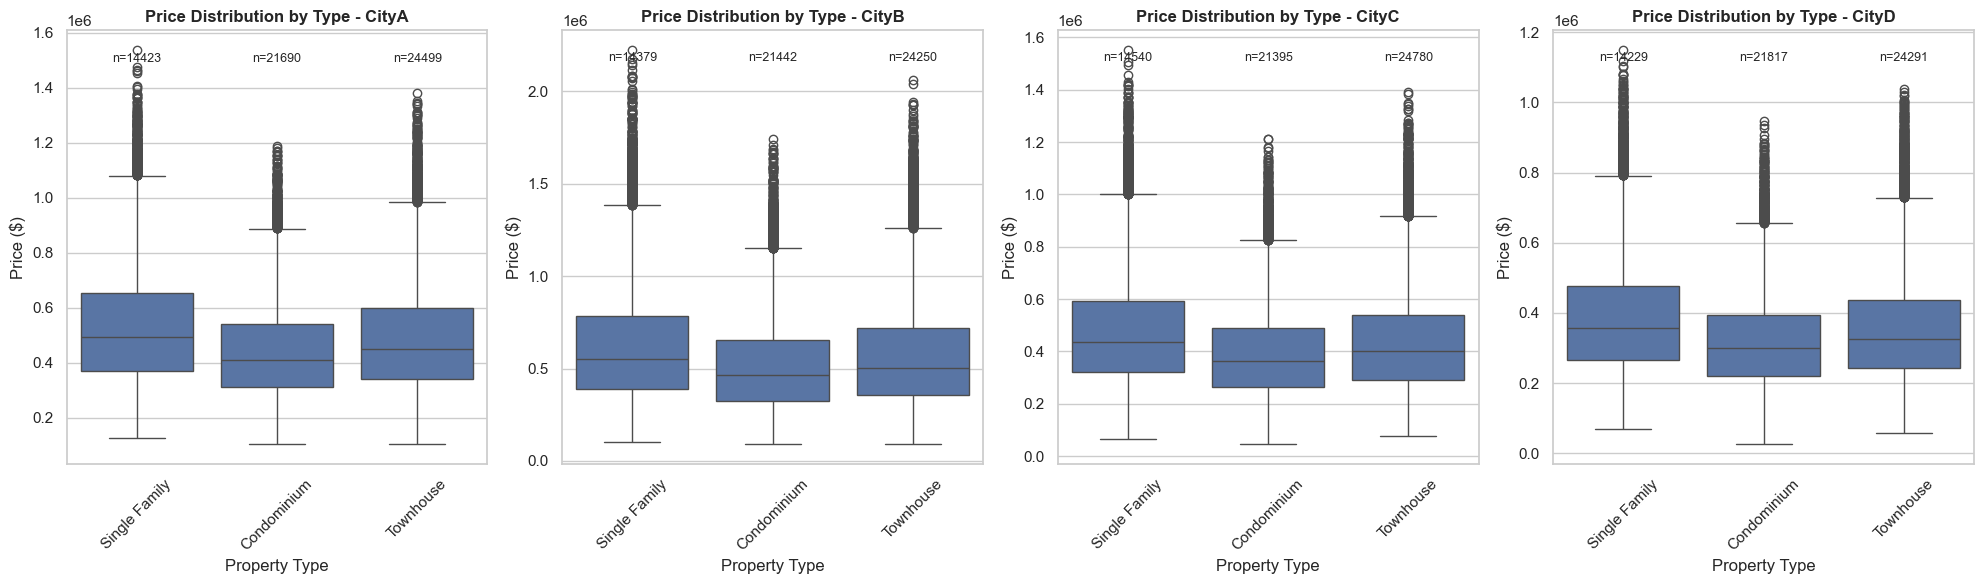

In [121]:
# Box plot: Price by Type for each Location
fig, axes = plt.subplots(1, len(df['Location'].unique()), figsize=(5*len(df['Location'].unique()), 6))
if len(df['Location'].unique()) == 1:
    axes = [axes]

locations = sorted(df['Location'].unique())
for idx, loc in enumerate(locations):
    df_loc = df[df['Location'] == loc]
    sns.boxplot(data=df_loc, x='Type', y='Price', ax=axes[idx])
    axes[idx].set_title(f'Price Distribution by Type - {loc}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Property Type')
    axes[idx].set_ylabel('Price ($)')
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Add sample sizes
    for i, t in enumerate(sorted(df_loc['Type'].unique())):
        count = len(df_loc[df_loc['Type'] == t])
        axes[idx].text(i, axes[idx].get_ylim()[1]*0.95, f'n={count}', 
                      ha='center', va='top', fontsize=9)

plt.tight_layout()
plt.show()


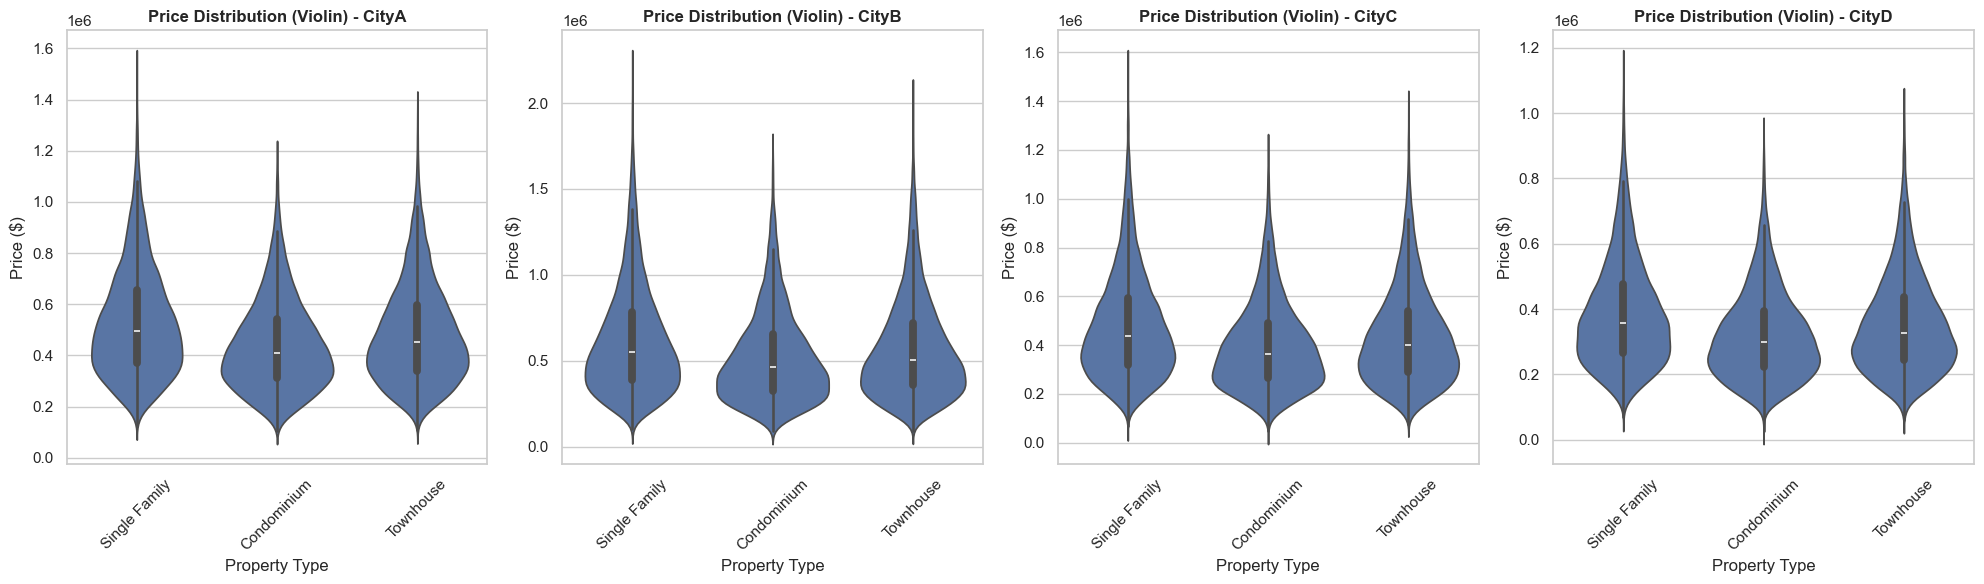

In [122]:
# Violin plot: Price by Type for each Location (alternative view)
fig, axes = plt.subplots(1, len(df['Location'].unique()), figsize=(5*len(df['Location'].unique()), 6))
if len(df['Location'].unique()) == 1:
    axes = [axes]

locations = sorted(df['Location'].unique())
for idx, loc in enumerate(locations):
    df_loc = df[df['Location'] == loc]
    sns.violinplot(data=df_loc, x='Type', y='Price', ax=axes[idx])
    axes[idx].set_title(f'Price Distribution (Violin) - {loc}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Property Type')
    axes[idx].set_ylabel('Price ($)')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


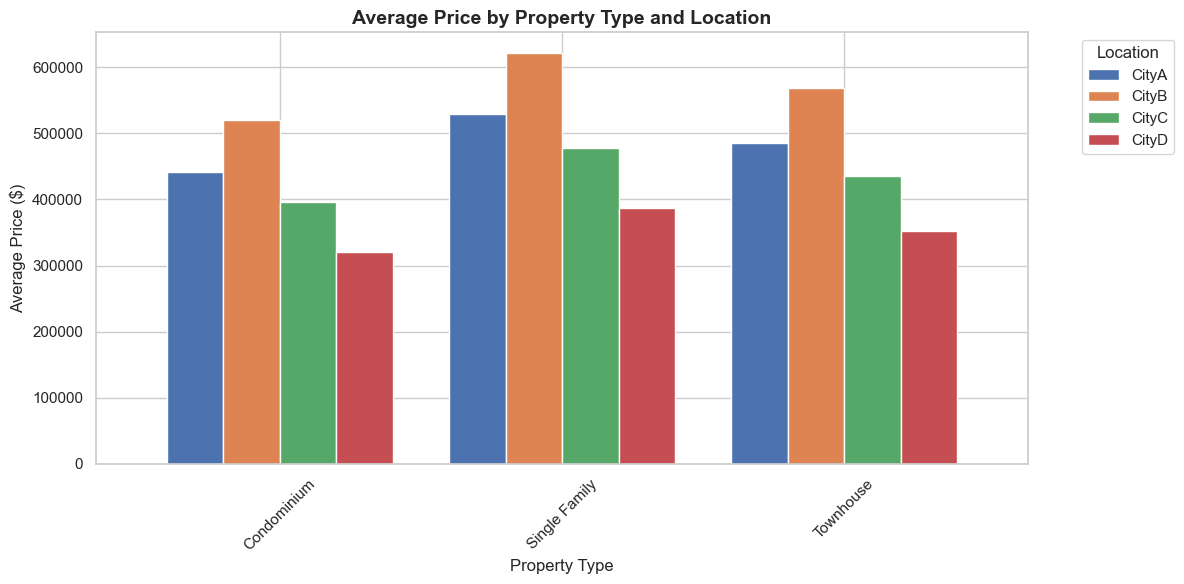

In [123]:
# Bar plot: Average Price by Type and Location
fig, ax = plt.subplots(figsize=(12, 6))

pivot_for_plot = df.pivot_table(values='Price', index='Type', columns='Location', aggfunc='mean')
pivot_for_plot.plot(kind='bar', ax=ax, width=0.8)

ax.set_title('Average Price by Property Type and Location', fontsize=14, fontweight='bold')
ax.set_xlabel('Property Type')
ax.set_ylabel('Average Price ($)')
ax.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


In [124]:
df.head()

,Location,Size,Bedrooms,Bathrooms,Condition,Type,Price,House_Age,Sold_Year
0,CityA,3974.0,2.0,2.0,Good,Single Family,324000.0,19.0,2020
1,CityA,1660.0,2.0,3.0,Good,Single Family,795000.0,92.0,2022
2,CityC,2094.0,2.0,2.0,Good,Single Family,385000.0,76.0,2020
3,CityB,1930.0,2.0,3.0,Good,Single Family,651000.0,121.0,2021
4,CityB,1895.0,5.0,2.0,New,Single Family,1878000.0,90.0,2024


In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

numeric_features = df[[
    "Size",
    "Bedrooms",
    "Bathrooms",
    "House_Age",
    "Sold_Year"
]]


In [126]:
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_features.columns
vif_data["VIF"] = [
    variance_inflation_factor(numeric_features.values, i)
    for i in range(numeric_features.shape[1])
]

vif_data


,Feature,VIF
0,Size,7.769970
1,Bedrooms,5.487492
2,Bathrooms,7.031362
3,House_Age,4.362886
4,Sold_Year,21.655275


In [127]:
df.drop(columns=["Sold_Year"], inplace=True)


In [128]:
df.head()

,Location,Size,Bedrooms,Bathrooms,Condition,Type,Price,House_Age
0,CityA,3974.0,2.0,2.0,Good,Single Family,324000.0,19.0
1,CityA,1660.0,2.0,3.0,Good,Single Family,795000.0,92.0
2,CityC,2094.0,2.0,2.0,Good,Single Family,385000.0,76.0
3,CityB,1930.0,2.0,3.0,Good,Single Family,651000.0,121.0
4,CityB,1895.0,5.0,2.0,New,Single Family,1878000.0,90.0


In [129]:
avg_price_city = (
    df.groupby("Location")["Price"]
      .mean()
      .sort_values(ascending=False)
)

avg_price_city


Location
CityB    576302.025936
CityA    490389.592820
CityC    440601.218809
CityD    357595.074332
Name: Price, dtype: float64

In [130]:
avg_price_city = (
    df.groupby("Type")["Price"]
      .mean()
      .sort_values(ascending=False)
)

avg_price_city


Type
Single Family    503501.019179
Townhouse        460453.046412
Condominium      419552.222473
Name: Price, dtype: float64

In [131]:
avg_price_city = (
    df.groupby("Condition")["Price"]
      .mean()
      .sort_values(ascending=False)
)

avg_price_city

Condition
New     673947.224944
Good    534357.283110
Fair    403272.593196
Poor    313213.487427
Name: Price, dtype: float64

In [133]:
condition_order = {
    "Poor": 1,
    "Fair": 2,
    "Good": 3,
    "New": 4
}

df["Condition_encoded"] = df["Condition"].map(condition_order)


In [135]:
df.drop(columns=["Condition"], inplace=True)
df.rename(columns={"Condition_encoded": "Condition"}, inplace=True)


In [138]:
df1 = df.copy()

In [139]:
df1.head()

,Location,Size,Bedrooms,Bathrooms,Type,Price,House_Age,Condition
0,CityA,3974.0,2.0,2.0,Single Family,324000.0,19.0,3
1,CityA,1660.0,2.0,3.0,Single Family,795000.0,92.0,3
2,CityC,2094.0,2.0,2.0,Single Family,385000.0,76.0,3
3,CityB,1930.0,2.0,3.0,Single Family,651000.0,121.0,3
4,CityB,1895.0,5.0,2.0,Single Family,1878000.0,90.0,4


In [140]:
df1 = pd.get_dummies(df1, columns=["Type"], drop_first=True)

type_dummy_cols = df1.filter(like="Type_").columns
df1[type_dummy_cols] = df1[type_dummy_cols].astype(int)


In [141]:
df1.head()

,Location,Size,Bedrooms,Bathrooms,Price,House_Age,Condition,Type_Single Family,Type_Townhouse
0,CityA,3974.0,2.0,2.0,324000.0,19.0,3,1,0
1,CityA,1660.0,2.0,3.0,795000.0,92.0,3,1,0
2,CityC,2094.0,2.0,2.0,385000.0,76.0,3,1,0
3,CityB,1930.0,2.0,3.0,651000.0,121.0,3,1,0
4,CityB,1895.0,5.0,2.0,1878000.0,90.0,4,1,0


In [142]:
df1 = pd.get_dummies(df1, columns=["Location"], drop_first=True)

location_dummy_cols = df1.filter(like="Location_").columns
df1[location_dummy_cols] = df1[location_dummy_cols].astype(int)

In [143]:
df1.head()

,Size,Bedrooms,Bathrooms,Price,House_Age,Condition,Type_Single Family,Type_Townhouse,Location_CityB,Location_CityC,Location_CityD
0,3974.0,2.0,2.0,324000.0,19.0,3,1,0,0,0,0
1,1660.0,2.0,3.0,795000.0,92.0,3,1,0,0,0,0
2,2094.0,2.0,2.0,385000.0,76.0,3,1,0,0,1,0
3,1930.0,2.0,3.0,651000.0,121.0,3,1,0,1,0,0
4,1895.0,5.0,2.0,1878000.0,90.0,4,1,0,1,0,0


In [144]:
df1.columns

Index(['Size', 'Bedrooms', 'Bathrooms', 'Price', 'House_Age', 'Condition',
       'Type_Single Family', 'Type_Townhouse', 'Location_CityB',
       'Location_CityC', 'Location_CityD'],
      dtype='str')